In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수 
ar_params = [0.7] # 자기회귀 계수
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0,1,n) # 잔차 생성

# ARMA(1,2) 모델 생성
data= [0,0] # 초기값 설정
for i in range(2,n):
    ar_term = ar_params[0] = data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])
    

# 데이터프레임 생성
df = pd.DataFrame({'Value':data})
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.338347
4   5.906515
..       ...
95  1.446764
96  1.668620
97  3.317376
98  4.156536
99  4.252116

[100 rows x 1 columns]


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -141.748
Date:                Thu, 01 Jun 2023   AIC                            293.496
Time:                        09:32:01   BIC                            306.522
Sample:                             0   HQIC                           298.768
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1778      4.024      0.790      0.430      -4.709      11.065
ar.L1          0.9679      0.022     43.451      0.000       0.924       1.012
ma.L1          0.4664      0.097      4.805      0.0

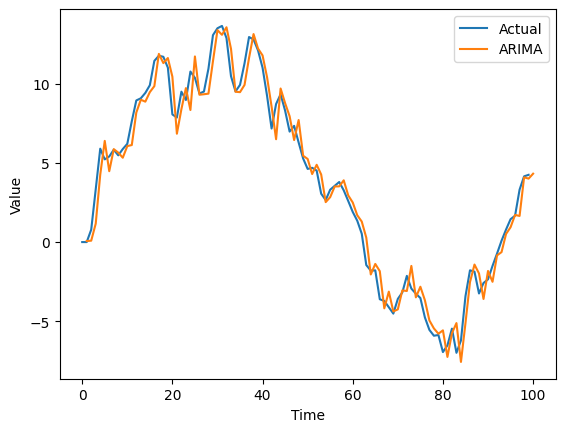

In [4]:
# ARIMA모델적합 
model = ARIMA(df['Value'], order=(1,0,2))
results = model.fit()

# ARIMA 모델 정보 출력
print(results.summary())

# 예측 결과 그래프 출력
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual') #실제 값
plt.plot(pred, label='ARIMA') # 에측치
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()